In [1]:
import cv2 as cv
import numpy as np

from copy import copy
from utils.classes import CellImage
from utils.helpers.helpers import get_images, show_images
from utils.helpers.enums import FilterAlg, ContoursDetectingAlg, MorphOperation, EdgesDetectingAlg, Pixel

In [2]:
images = [CellImage(image) for image in get_images('./cells_images/Provotorova/')]
for image in images:
    image.delete_description()

In [3]:
image_0 = images[0]

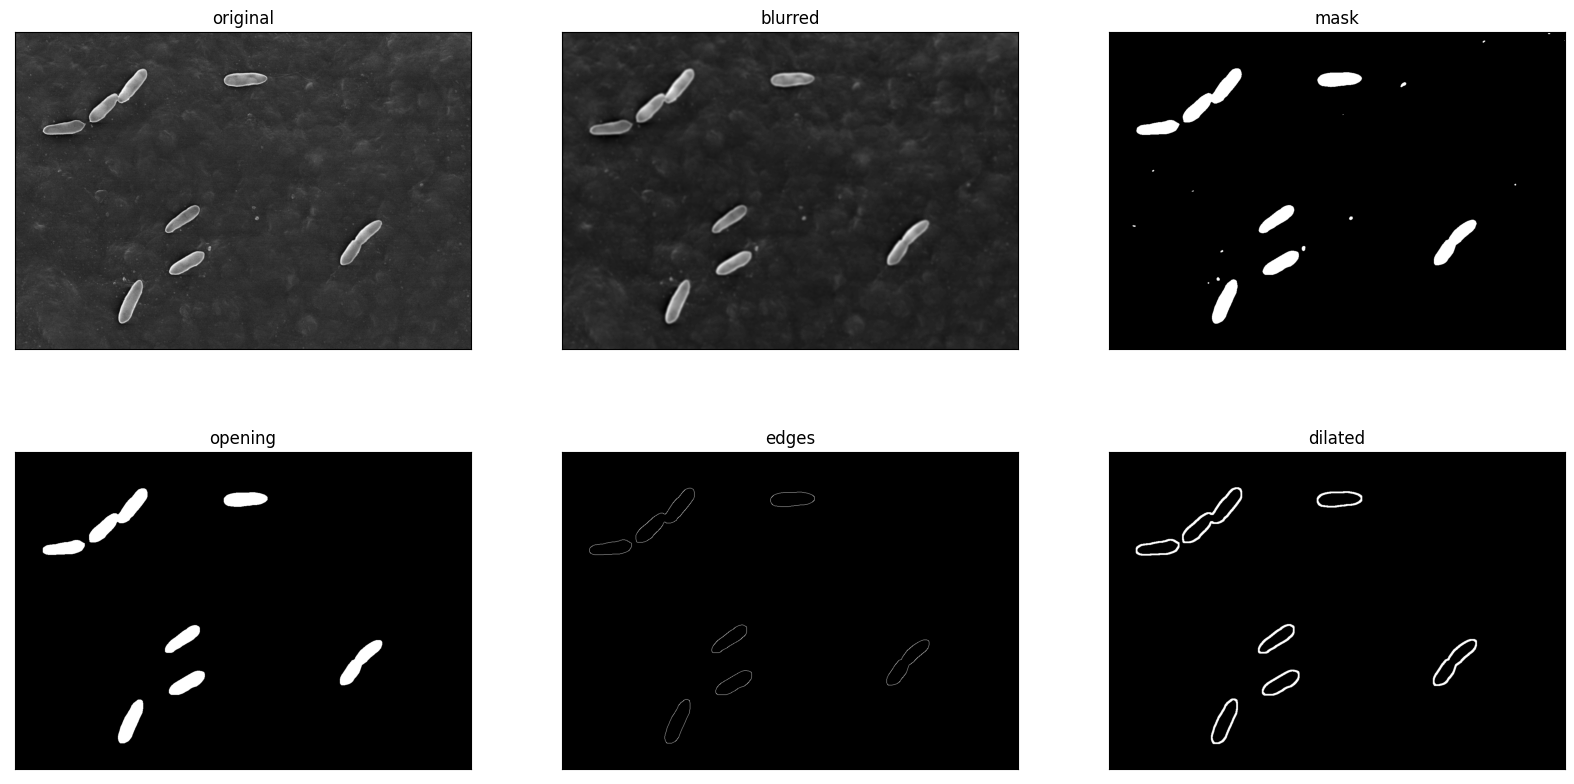

In [4]:
image = copy(image_0)
show_images([
    (image.src, 'original'),
    (image.filter(alg=FilterAlg.GAUSSIAN, ksize=(13, 13)), 'blurred'),
    (image.detect_contours(alg=ContoursDetectingAlg.BY_HAND, threshold_value=110), 'mask'),
    (image.morph_transform(alg=MorphOperation.OPENING, iterations=2), 'opening'),
    (image.detect_edges(alg=EdgesDetectingAlg.CANNY, threshold1=0, threshold2=1), 'edges'),
    (image.morph_transform(alg=MorphOperation.DILATION), 'dilated')
], grid=(2, 3), size_inches=(20, 10))

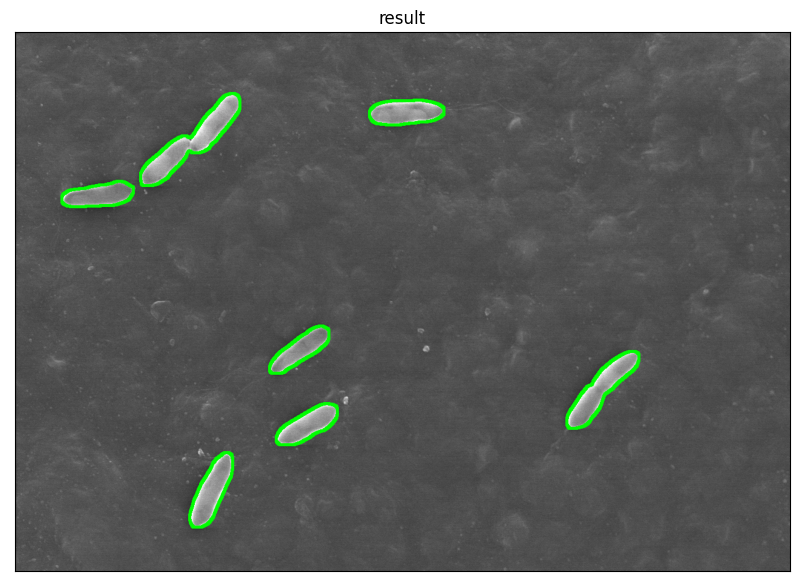

In [6]:
result = np.where(
    cv.cvtColor(image.src, cv.COLOR_GRAY2RGB) == Pixel.WHITE_GRAY.value,
    Pixel.GREEN.value,
    cv.cvtColor(image_0.src, cv.COLOR_GRAY2RGB)
)
show_images([(result, 'result')], grid=(1,1))